# Project: TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

This is important to help the film industry have an insightful look as to the woork they do...

<br>

Some questions answeered in this Notebook are:
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- How many movies are no budget movies and how do they compare in popularity and total vote average to movies with a budget?
- Most popular actors in an action film

In [178]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Data Wrangling

I'll tinker around the datasets to refine it and prepare it for EDA.

In [179]:
# read in the data
df = pd.read_csv('tmdb.csv')

In [180]:
# have a quick glance at the data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### The data has 10866 rows and 21 columns

The first two columns, **"id","imdb_id", "genres" "production_companies", "release_date", and "release_year" are categorical**. <br>

**"popularity", "vote_count", "vote_average" are ordinal**,	<br>

**"budget", "revenue", "budget_adj", and "revenue_adj" are discrete.** <br>

The next seven columns **"original_title", "cast", "homepage", "director", "tagline", "keywords", and "overview" are nominal** <br>

**"runtime" is continous** 

### Data Cleaning

- Remove unnecessary columns
- Drop missing values
- Drop duplicates
- Reformat string with '|' to a list

In [181]:
# drop columns
df.drop(['imdb_id', 'homepage', 'release_date'], axis=1, inplace=True)

In [182]:
# drop missing values
dfNullity = df.isnull()
dfNullity = dfNullity.sum()
dfNullity = dfNullity.to_frame().reset_index()
dfNullity.rename(columns={'index':'col', 0:'nullCount'}, inplace=True)
dfNullity.query('nullCount > 0', inplace=True)
print('Columns that have missing vlaues:', '\n', dfNullity) # find columns with missing values and how many rows are missing

df.dropna(inplace=True) 
print(df.isnull().sum()) # confirm that there is no other missing value

Columns that have missing vlaues: 
                      col  nullCount
5                   cast         76
6               director         44
7                tagline       2824
8               keywords       1493
9               overview          4
11                genres         23
12  production_companies       1030
id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


In [183]:
# drop duplicated rows
print ('Number of duplicates originally:', df.duplicated().sum()) # check for duplicates
df.drop_duplicates(inplace=True) # drop duplicates
print ('Number of duplicates afterwards:', df.duplicated().sum()) # confirm absence of duplicate

# reset index after droping missing values
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

Number of duplicates originally: 1
Number of duplicates afterwards: 0


In [184]:
# reformat strings with '|' to lists
columnList = ['cast', 'genres', 'keywords', 'production_companies']
for column in columnList:
    df[column] = df[column].apply(lambda x: x.split('|'))

### After cleaning, the data now has 7031 Rows and 18 Columns

which is 17.64% of the original data

Having performed basic cleaning, it's time to go deeper. Examine the data and find out if there are missing values that are not in 'nan' format.
For example, if a row in the 'budget' column is 0 should this be treated as a missing value?

**Ocurrences like this will be treated as NO BUDGET MOVIES**

<br>

Because the data is not documented, we cannot tell the currenchy but a google search of the [Insurget buddget](https://www.google.com/search?q=budget+for+insurgent&sxsrf=ALiCzsasLzTnQiA72_PQ9i5Xi-Jh6iFnRQ%3A1652594570739&ei=ipeAYqvlLNKD8gKB9bY4&oq=budget+for+insurgetnt&gs_lcp=Cgdnd3Mtd2l6EAMYADIHCCEQChCgATIHCCEQChCgAToHCAAQRxCwAzoHCCMQsAIQJzoECAAQDToECCMQJzoFCAAQgAQ6BQgAEJECOggIABAPEBYQHjoGCAAQFhAeOgUIIRCgAUoECEEYAEoECEYYAFD8AljqJmDwM2gCcAF4AIABywKIAZI0kgEIMC4yLjI0LjOYAQCgAQHIAQjAAQE&sclient=gws-wiz/) shows a match with what is on the data.

**So we can say that the financial values are in USD**

<br>

Some of the columns are lists, exploding/unnesting them will make the dataframe have so many rows and would take up more memory space.

**For any question if necessary, the column will be exploded/unnested**

## Exploratory Data Analysis

The beginig part of this EDA section will cover very simple 1 dimensional analysis. 

To make this efficient, a `plotHist()` function will be built to make repetitve histograms on different variables in the data.

In [185]:
def plotHist(df, x, bins=20, figsize=(14, 6)):
    '''
    Creates a histogram for a given DataFrame and Series(column)
    Args:
        df (DataFrame): data containing x varribale
        x (string): column to plot chart with
        bins (int): number of bins for histogram plot
        figsize (tuple): height and width dimensions of chart
    Output:
        Histogram chart
    '''
    # plot chart
    df[x].hist(bins=bins, grid=False, figsize=figsize);
    
    x = x.replace('_', ' ') # reformating strings with underscore
    plt.title(f'Distribution of {x}'.title(), fontsize=14, weight='bold') # formatting chart
    plt.xlabel(x.title(), fontsize=10, weight='bold') #formatting label
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold') # making a y label

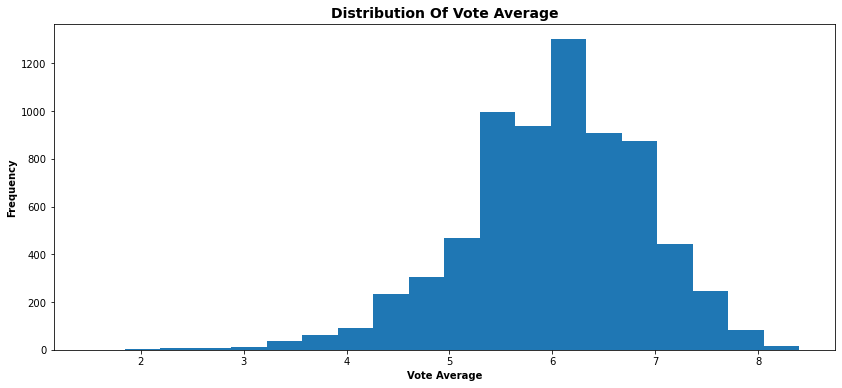

In [186]:
plotHist(df, 'vote_average')

Vote average is negatively skewed which means that there are more high vote averages than there are less vote averages

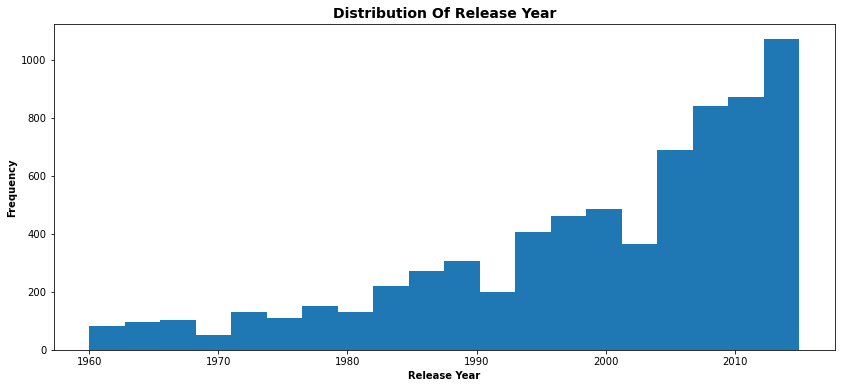

In [187]:
plotHist(df, 'release_year')

More and more movies are made each year

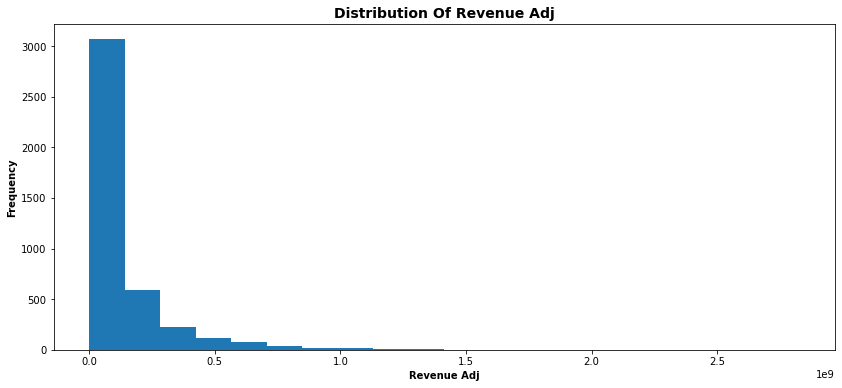

In [188]:
plotHist(df.query('revenue_adj > 0'), 'revenue_adj')

revenue is positively skewed which means, there are more movies with a low revenue

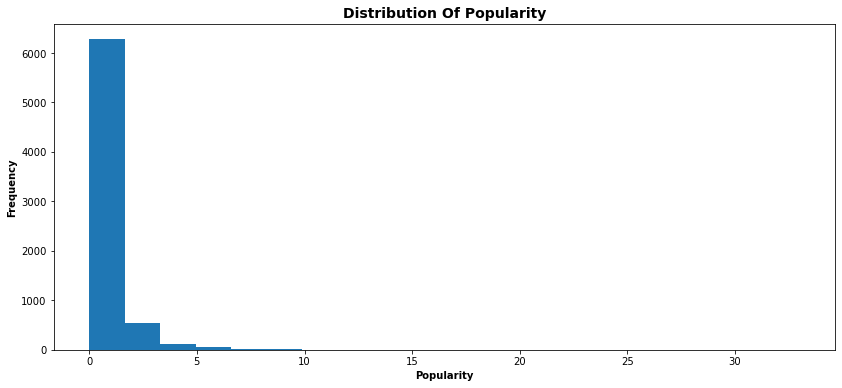

In [189]:
plotHist(df, 'popularity')

popularity is positively skewed which means, there are more movies with a low popularity

### Which genres are most popular from year to year?

There are about 56 years in the data, so it is split into the past 5 yeaars (2011 - 2015)

In [190]:
# groupby thee year and genres, select the popularityh column
genres = df.explode('genres')
genres = genres.groupby(by=['release_year', 'genres']).sum()['popularity']
genres = genres.reset_index() 

# filter to 5 years ago
genres.query('release_year >= 2011')

df2011 = genres.query('release_year == 2011')
df2012 = genres.query('release_year == 2012')
df2013 = genres.query('release_year == 2013')
df2014 = genres.query('release_year == 2014')
df2015 = genres.query('release_year == 2015')

df2011 = df2011[df2011.popularity == df2011.popularity.max()]
df2012 = df2012[df2012.popularity == df2012.popularity.max()]
df2013 = df2013[df2013.popularity == df2013.popularity.max()]
df2014 = df2014[df2014.popularity == df2014.popularity.max()]
df2015 = df2015[df2015.popularity == df2015.popularity.max()]

# concat the five years values into one DF
genres = pd.concat([df2011, df2012, df2013, df2014, df2015], ignore_index=True)
genres

,release_year,genres,popularity
0,2011,Thriller,100.539515
1,2012,Drama,108.156863
2,2013,Drama,128.664750
3,2014,Action,198.987352
4,2015,Action,221.309653


Text(105.0, 0.5, 'Release year')

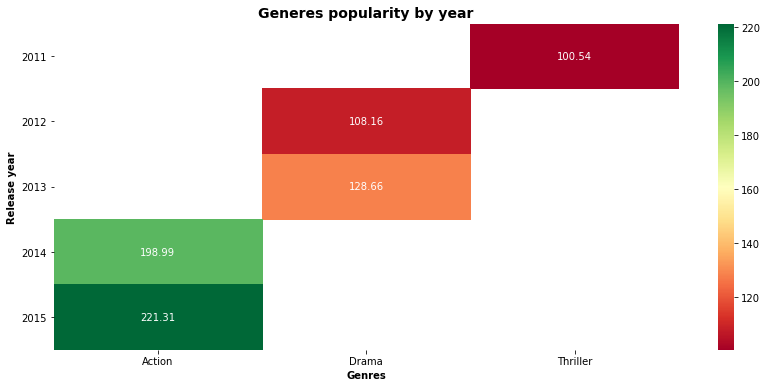

In [191]:
# plot a heatmap for gneres popularity by year
plt.figure(figsize=[14, 6])
sb.heatmap(genres.set_index(['release_year', 'genres']).unstack('genres').droplevel(level=0, axis=1), annot=True, fmt='.2f', cmap='RdYlGn');
plt.yticks(rotation=0);

plt.title('Generes popularity by year', fontsize=14, weight='bold') # formatting chart
plt.xlabel('Genres', fontsize=10, weight='bold') #formatting label
plt.ylabel('Release year', fontsize=10, weight='bold') # making a y label

### What kinds of properties are associated with movies that have high revenues?

In [192]:
# correlation table
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.059001,-0.101641,-0.067851,-0.082703,0.012479,-0.091744,0.484502,-0.161177,-0.119847
popularity,0.059001,1.000000,0.521981,0.653280,0.189413,0.798939,0.272979,0.169882,0.486096,0.594809
budget,-0.101641,0.521981,1.000000,0.725662,0.249326,0.618222,0.100464,0.217755,0.967213,0.602990
revenue,-0.067851,0.653280,0.725662,1.000000,0.220666,0.782714,0.217408,0.128270,0.696864,0.915085
runtime,-0.082703,0.189413,0.249326,0.220666,1.000000,0.227124,0.260809,-0.103767,0.293687,0.239720
vote_count,0.012479,0.798939,0.618222,0.782714,0.227124,1.000000,0.320417,0.182409,0.569737,0.695303
vote_average,-0.091744,0.272979,0.100464,0.217408,0.260809,0.320417,1.000000,-0.128344,0.115151,0.244492
release_year,0.484502,0.169882,0.217755,0.128270,-0.103767,0.182409,-0.128344,1.000000,0.111404,-0.013536
budget_adj,-0.161177,0.486096,0.967213,0.696864,0.293687,0.569737,0.115151,0.111404,1.000000,0.630160
revenue_adj,-0.119847,0.594809,0.602990,0.915085,0.239720,0.695303,0.244492,-0.013536,0.630160,1.000000


In [193]:
def plotScatter(df, x, y):
    '''
    Plots a correlation plot (scatterplot) between two variables
    Args:
        df (DataFrame): desirted data contaning x and y variables
        x (str): x variable, usually a Series in df
        y (str): y variable, usually a Series in df
    Output:
        A sctter plot of x and y variables
    '''
    plt.figure(figsize=(10,8));
    plt.scatter(df[x], df[y]);
    x = x.replace('_', ' ').title()
    y = y.replace('_', ' ').title()
    plt.xlabel(x, fontsize=10);
    plt.ylabel(y, fontsize=10);
    plt.title(f'Scatterplot showing correlation between {x}, and {y}', fontsize=15)

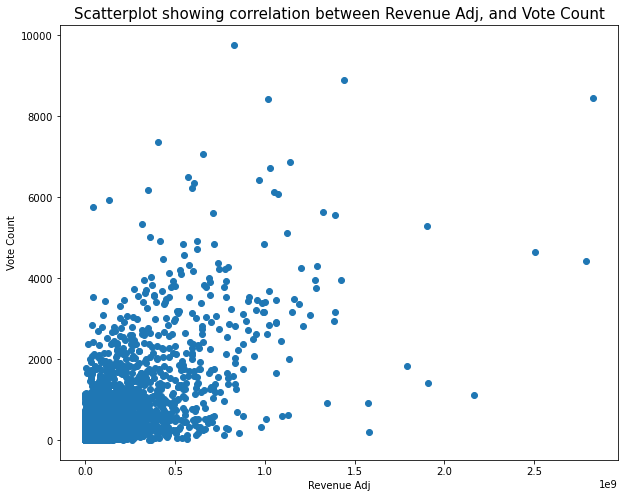

In [194]:
plotScatter(df, 'revenue_adj', 'vote_count')

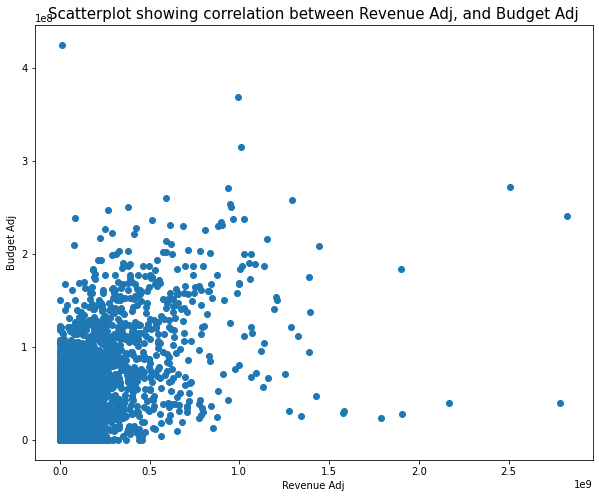

In [195]:
plotScatter(df, 'revenue_adj', 'budget_adj')

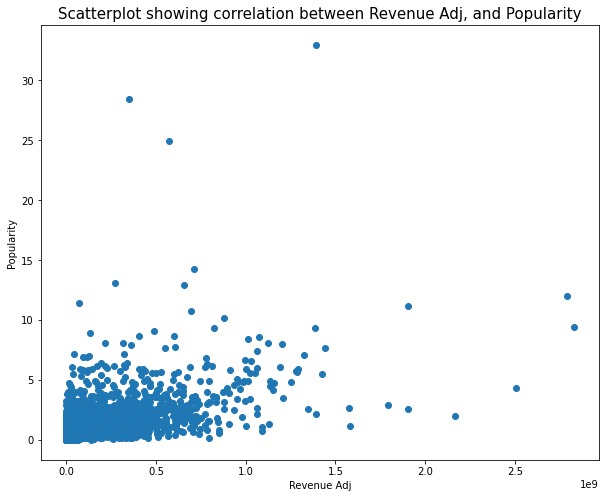

In [196]:
plotScatter(df, 'revenue_adj', 'popularity')

**budget**, **vote_count**, and **popularity** are associated with high revenue movies

### How many movies are no budget movies and how do they compare in popularity and total vote average to movies with a budget?

In [197]:
noBudget = df[df.budget.isin([0])]
budget = df[~df.budget.isin([0])]

noBudget.reset_index(inplace=True)
budget.reset_index(inplace=True)

print('There are', noBudget.shape[0], 'no-budget movies')
print('There are', budget.shape[0], 'movies with a financial budget', '\n')

print('No-budget movies have a total popularity of:', round(noBudget.popularity.sum()))
print('Movies with a financial budget have a total popularity of:', round(budget.popularity.sum()), '\n')

print('No-budget movies have a total vote average of:', round(noBudget.vote_average.sum()))
print('Movies with a financail budget have a total vote average of:', round(budget.vote_average.sum()), '\n')

print('On an average, no-budget movies make around', round(noBudget.revenue_adj.mean()), 'USD')
print('On an average, movies with a financial budget make around', round(budget.revenue_adj.mean()), 'USD')

There are 2766 no-budget movies
There are 4265 movies with a financial budget 

No-budget movies have a total popularity of: 1089
Movies with a financial budget have a total popularity of: 4743 

No-budget movies have a total vote average of: 16303
Movies with a financail budget have a total vote average of: 25977 

On an average, no-budget movies make around 9419484 USD
On an average, movies with a financial budget make around 119907511 USD


we can see that **popularity**, **vote_average**, and **revenue_adj**... moves that have a financial budget perform better than no-budget movies

In [198]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7031.000000,7031.000000,7.031000e+03,7.031000e+03,7031.000000,7031.000000,7031.000000,7031.000000,7.031000e+03,7.031000e+03
mean,51930.810411,0.829496,2.084295e+07,5.932460e+07,104.839994,312.713128,6.013384,1999.382307,2.500879e+07,7.644145e+07
std,81407.049737,1.180266,3.602356e+07,1.404161e+08,23.804709,693.227171,0.876495,13.468579,3.953511e+07,1.730470e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9540.500000,0.278563,0.000000e+00,0.000000e+00,92.000000,24.000000,5.500000,1992.000000,0.000000e+00,0.000000e+00
50%,14741.000000,0.506241,5.000000e+06,4.858139e+06,101.000000,73.000000,6.100000,2003.000000,6.951084e+06,6.448898e+06
75%,46983.500000,0.956339,2.600000e+07,5.472242e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.526298e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Most popular actors in an action film

In [199]:
# to betther do this, explode genres and query for action. Then explode cast and find the most popular actor
dfAction = df.explode('genres').query('genres == "Action"')
dfActionCast = dfAction.explode('cast')
dfActionCast = dfActionCast.groupby('cast')['popularity'].agg([('Number of movies', 'count'), ('Average Popularity', 'mean')]).sort_values('Average Popularity', ascending=False)
dfActionCast.reset_index(inplace=True)
dfActionCast[dfActionCast['Number of movies'] > 5][:10]

,cast,Number of movies,Average Popularity
24,Tom Hardy,7,6.940143
44,Mark Hamill,6,5.698868
55,Scarlett Johansson,8,5.274914
59,Zoe Saldana,6,5.058994
67,Orlando Bloom,9,4.822856
68,Vincent D'Onofrio,8,4.771668
73,Charlize Theron,8,4.558355
84,Viggo Mortensen,6,4.379407
101,Ian McKellen,9,3.935841
109,Kate Beckinsale,7,3.847188


In [200]:
dfActionActor = df.query('release_year == 2015 or release_year == 2014')
dfActionActor = dfActionActor.explode('cast')
dfActionActor = dfActionActor.explode('genres')
dfActionActor = dfActionActor.groupby(by=['cast', 'genres']).sum()['popularity']
dfActionActor = dfActionActor.reset_index()
dfActionActor = dfActionActor.query('genres == "Action"')
dfActionActor = dfActionActor.sort_values(by=['popularity'], ascending=False)
dfActionActor.head(10)

,cast,genres,popularity
1339,Chris Pratt,Action,47.296968
2814,Irrfan Khan,Action,32.985763
6988,Vincent D'Onofrio,Action,32.985763
1045,Bryce Dallas Howard,Action,32.985763
5295,Nick Robinson,Action,32.985763
5256,Nicholas Hoult,Action,28.930232
2741,Hugh Keays-Byrne,Action,28.419936
6803,Tom Hardy,Action,28.419936
3624,Josh Helman,Action,28.419936
1252,Charlize Theron,Action,28.419936


## Conclusions

In Summary and as the data suggests, a high performing movie would require a budget. The average budget spent on a movie is, **25,008,790 USD** but well assured the invested money will yeild high returns as the averge revenuw on a movie is, **76,441,450 USD** which is thrice the average budget spend

<br>

The fans love a good action movie so if you want you movie to be very popular, it should be an action movie and you probably wanna cast actors like, **Chris Pratt**, **Irrfan Khan**, and **Vincent D'Onofrio**

<br>

**Some limitations of the data are:**
- The dat ahs missing values
- The data has duplicates
- There is no documentation for the data to explain the varaibles
- "year" in the "release_date" column is different from the "release_year" column

In [201]:
# jupyter nbconvert --to html tmdbAnalysis.ipynb